In [1]:
all_data = readRDS('../processed_data/single_cell/stats_input_data_0825.rds')


In [2]:
f = readRDS('../processed_data/single_cell/pseudobulk_degs_0825.rds')

In [15]:
f$degs_all$Ex$res['CEPT1',]

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CEPT1,-0.04660693,5.381187,-0.8431939,0.406434,0.8251202,-5.204246


In [41]:
df = all_data$summary

In [110]:
df$AD = ifelse(df$niareagansc<3, 'AD', 'non-AD')

In [114]:
# Install and load necessary libraries
# install.packages("ggplot2")
# install.packages("patchwork")
# install.packages("dplyr")
# install.packages("ggsci")
library(ggplot2)
library(patchwork)
library(dplyr)
library(ggsci)
library(cowplot)

# Create a function to generate a pie chart for a specific column
create_pie_chart <- function(df, column_name) {
  df[[column_name]] <- as.character(df[[column_name]])
  
  percentages <- df %>%
    group_by(!!sym(column_name)) %>%
    summarise(count = n()) %>%
    mutate(percentage = count / sum(count) * 100)
  
  ggplot(percentages, aes(x = "", y = percentage, fill = !!sym(column_name))) +
    geom_bar(width = 1, stat = "identity") +
    coord_polar("y", start = 0) +
    theme_void() +
    scale_fill_npg(guide = guide_legend(title.position = "top")) +  # Use the NPG color palette
    ggtitle(column_name) +
    geom_text(aes(label = paste0(round(percentage, 1), "%")), 
              position = position_stack(vjust = 0.5), 
              color = "white", size = 5)     # Center the legend title
}

# Create individual pie charts
column_names = c('AD', 'ceradsc', 'braaksc', 'msex')

pie_charts1 <- lapply(column_names, function(col) create_pie_chart(df, col))

#pie_charts1 <- lapply(column_names, function(col) create_pie_chart(df[df$LOF==0,], col))
#pie_charts2 <- lapply(column_names, function(col) create_pie_chart(df[df$LOF==1,], col))

# Arrange the pie charts in a 2x4 grid
pie_grid <- wrap_plots(c(pie_charts1), ncol = 4)

pdf('../pdf_figures/pie_chart.pdf')
pie_grid      
dev.off()                      
# # Wrap each pie chart with a grey box
# pie_charts_with_boxes <- lapply(pie_charts, function(p) {
#   ggdraw(p) + 
#     theme(plot.background = element_rect(color = "grey", fill = NA, size = 0.5))
# })

# # Arrange the pie charts in a 2x4 grid
# pie_grid <- wrap_plots(pie_charts_with_boxes, ncol = 4) + plot_layout(guides = "collect")
                      
# pie_grid

png 
  2

[1] "non-AD" "non-AD" "AD"     "AD"     "non-AD" "AD"     "AD"     "non-AD"
 [9] "AD"     "AD"     "AD"     "AD"     "AD"     "non-AD" "AD"     "AD"    
[17] "AD"     "non-AD" "non-AD" "AD"     "AD"     "AD"     "non-AD" "AD"    
[25] "AD"     "AD"     "AD"     "AD"     "AD"     "AD"     "AD"     "AD"    
[33] "AD"     "AD"     "AD"     "AD"

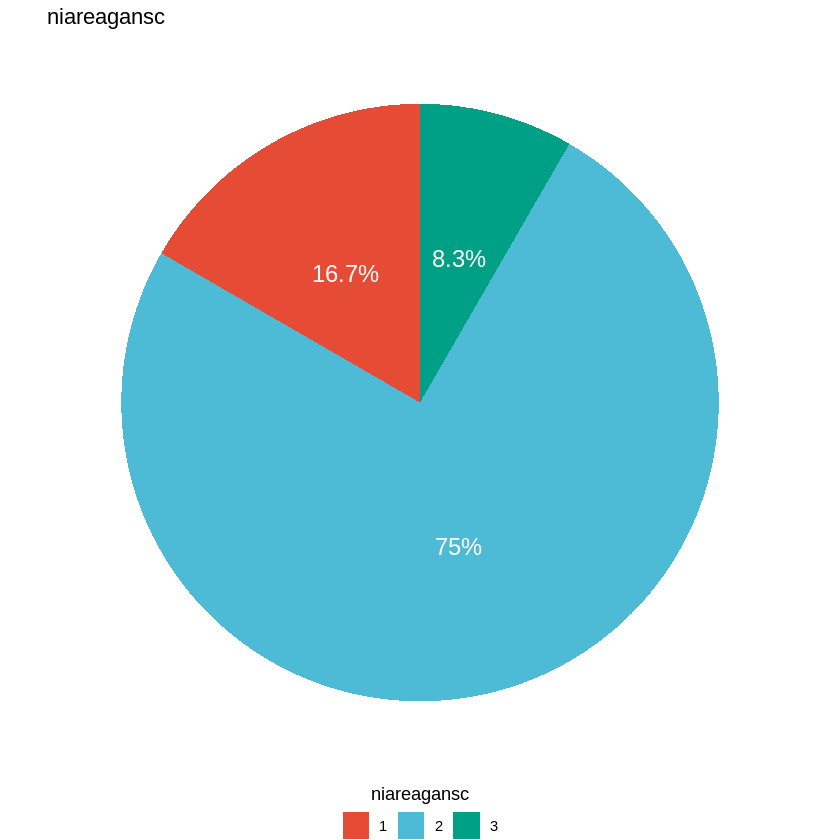

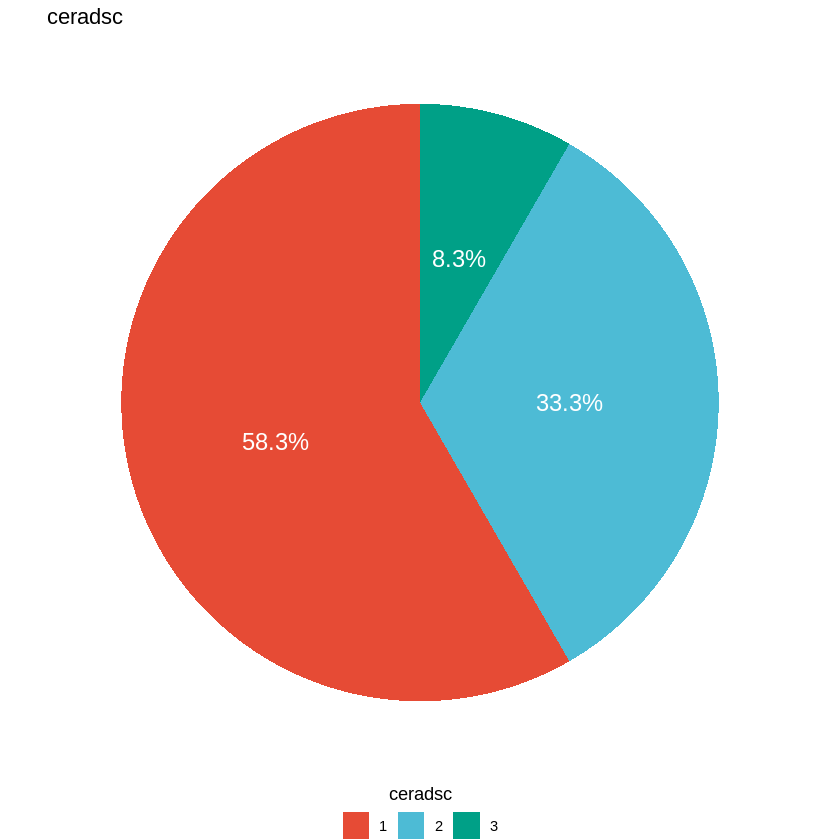

[[1]]

[[2]]

[[3]]

[[4]]


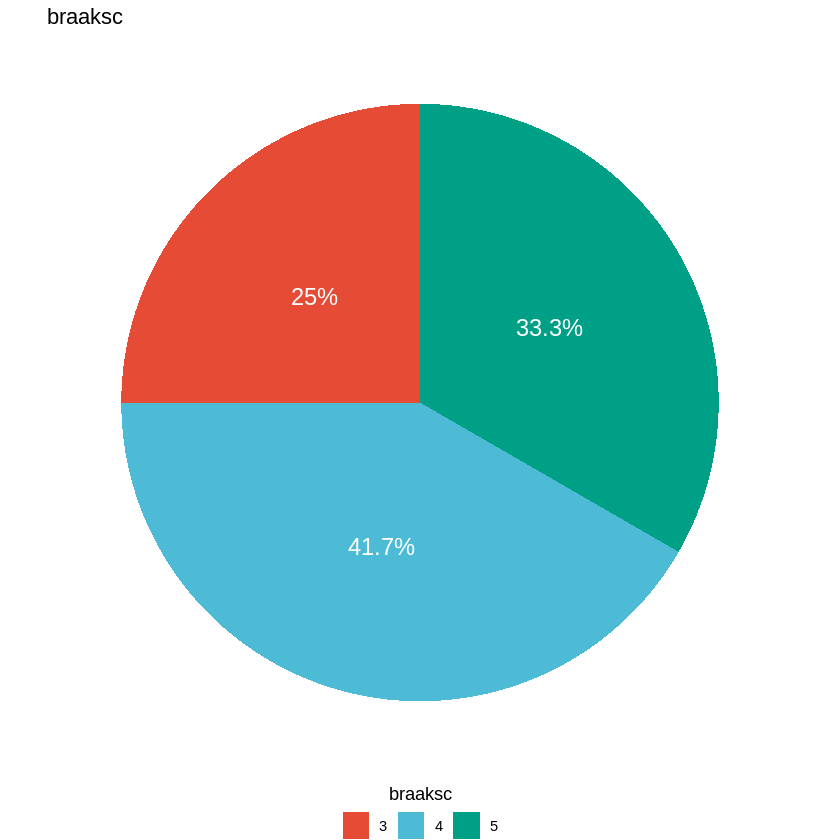

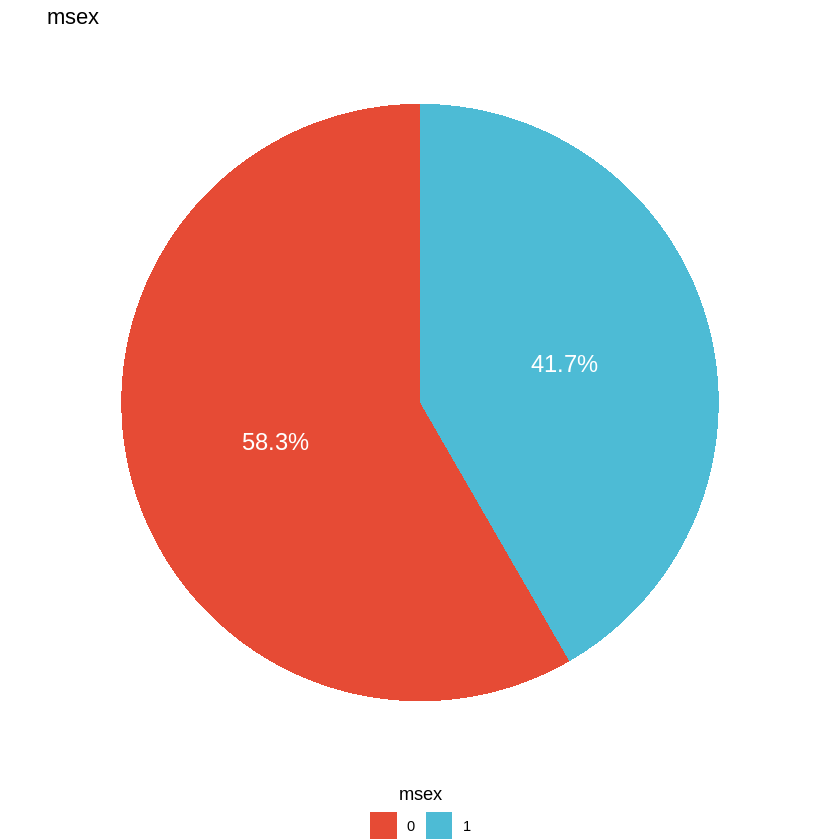

In [105]:
pie_charts2

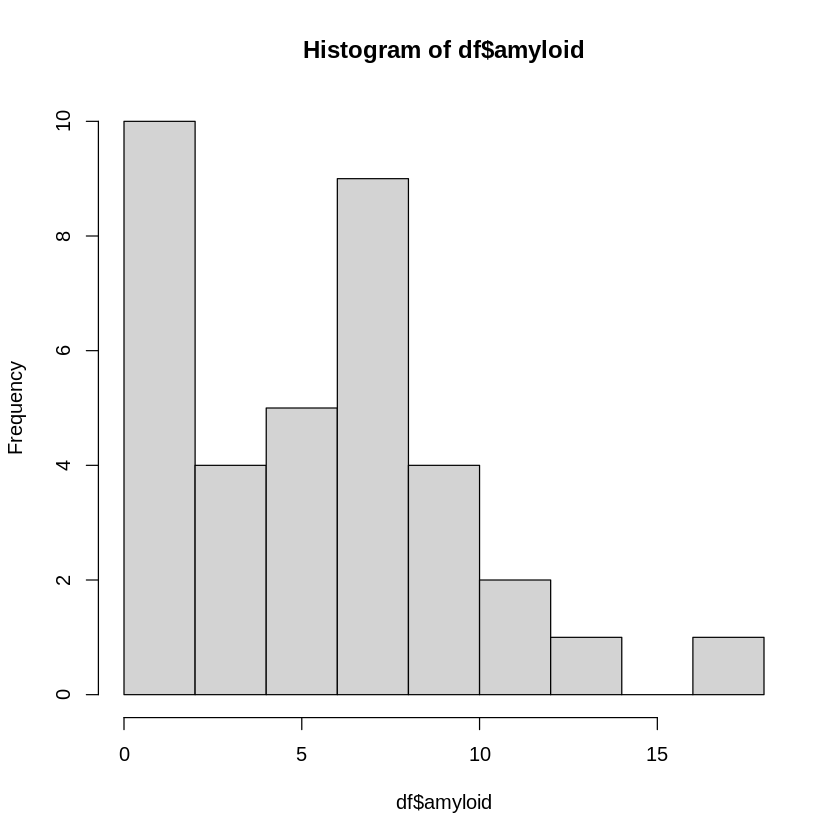

In [82]:
hist(df$amyloid)

In [46]:
as.character(df[['study']])

[1] "ROS " "MAP " "MAP " "MAP " "ROS " "ROS " "ROS " "MAP " "MAP " "MAP "
[11] "ROS " "MAP " "ROS " "ROS " "MAP " "MAP " "MAP " "MAP " "ROS " "ROS "
[21] "MAP " "MAP " "MAP " "MAP " "MAP " "MAP " "ROS " "ROS " "ROS " "ROS "
[31] "ROS " "ROS " "ROS " "ROS " "ROS " "ROS "

In [35]:
df

,X,sample_id,molecule_h5,study,pmi,age_death,msex,amyloid,ceradsc,nft,⋯,individualID,WGSid,ABCA7LoF,TREM2High,ABCA1High,ADAM10High,ATP8B4High,SORL1High,APOE4,LOF
,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,⋯,<fct>,<fct>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>
10485914,0,D20-7432,/home/gridsan/djuna/homer/github/ABCA7lof2/raw_data/cellranger_counts_out/D20-7432/outs/molecule_info.h5,ROS,6.000000,84.43532,1,0.000000,3,0.16602191,⋯,R1466631,SM-CJFOJ,1,0,0,0,0,0,0,1
49676048,1,D20-7433,/home/gridsan/djuna/homer/github/ABCA7lof2/raw_data/cellranger_counts_out/D20-7433/outs/molecule_info.h5,MAP,5.250000,85.53320,0,1.151250,3,1.11253004,⋯,R1476864,SM-CJFND,0,0,0,0,0,0,0,0
89546375,2,D20-7434,/home/gridsan/djuna/homer/github/ABCA7lof2/raw_data/cellranger_counts_out/D20-7434/outs/molecule_info.h5,MAP,5.833333,85.69473,1,11.793750,2,1.10374911,⋯,R3864948,SM-CJFNM,0,0,0,0,0,0,0,0
50409406,3,D20-7435,/home/gridsan/djuna/homer/github/ABCA7lof2/raw_data/cellranger_counts_out/D20-7435/outs/molecule_info.h5,MAP,7.000000,79.68789,0,0.531000,1,0.13771282,⋯,R3664544,MAP50409406,1,0,0,0,0,0,1,1
20875195,4,D20-7436,/home/gridsan/djuna/homer/github/ABCA7lof2/raw_data/cellranger_counts_out/D20-7436/outs/molecule_info.h5,ROS,4.083333,74.05065,0,0.000000,4,0.04601522,⋯,R8474433,SM-CJEKK,0,0,0,0,0,0,0,0
21000630,5,D20-7437,/home/gridsan/djuna/homer/github/ABCA7lof2/raw_data/cellranger_counts_out/D20-7437/outs/molecule_info.h5,ROS,4.716667,89.39357,0,6.938333,2,0.39172213,⋯,R2079629,SM-CJFN9,0,0,0,0,0,0,0,0
20201891,6,D20-7438,/home/gridsan/djuna/homer/github/ABCA7lof2/raw_data/cellranger_counts_out/D20-7438/outs/molecule_info.h5,ROS,7.833333,100.76660,0,2.465000,2,0.26274252,⋯,R8003745,SM-CJFOK,1,0,0,0,0,0,0,1
50100482,7,D20-7439,/home/gridsan/djuna/homer/github/ABCA7lof2/raw_data/cellranger_counts_out/D20-7439/outs/molecule_info.h5,MAP,6.216667,89.36071,0,0.204375,4,0.14884186,⋯,R5683778,SM-CJFNB,0,0,0,0,0,0,0,0
71648351,8,D20-7440,/home/gridsan/djuna/homer/github/ABCA7lof2/raw_data/cellranger_counts_out/D20-7440/outs/molecule_info.h5,MAP,3.450000,93.80151,0,9.146250,1,0.34203897,⋯,R8197015,SM-CJEHW,1,0,0,0,0,0,0,1


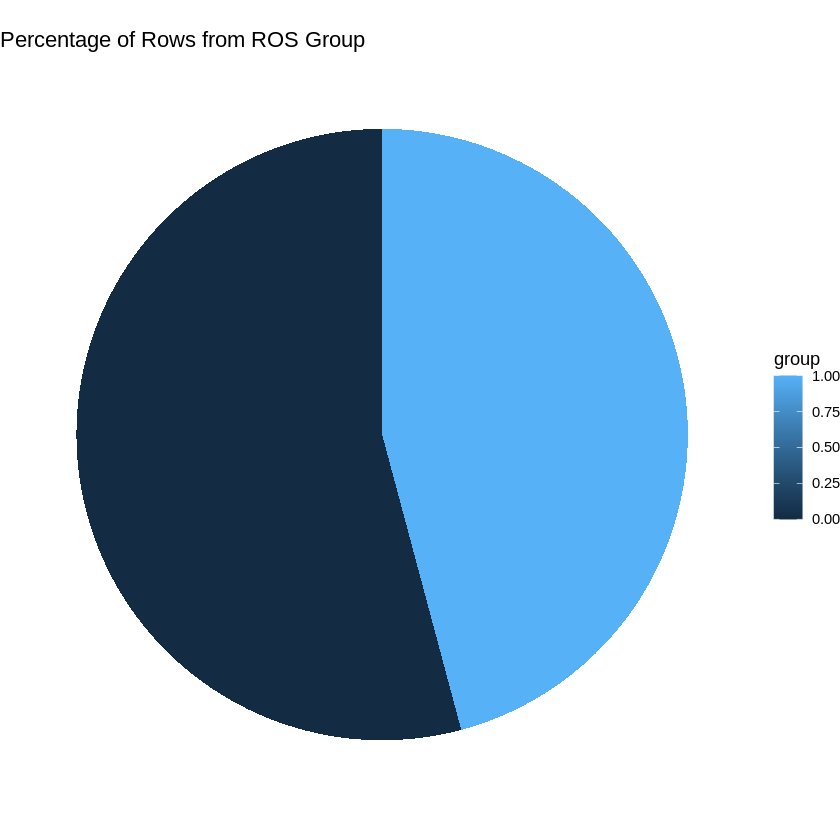

In [24]:
# Install and load necessary libraries
library(ggplot2)

df = df[df$LOF==0,]
        
# Assuming df is your data frame
# Calculate the percentage of ROS rows
ros_percentage <- sum(df$msex == 1) / nrow(df) * 100
other_percentage <- 100 - ros_percentage

# Create a data frame for the pie chart
pie_data <- data.frame(
  group = c(1, 0),
  value = c(ros_percentage, other_percentage)
)

# Plot the pie chart
ggplot(pie_data, aes(x = "", y = value, fill = group)) +
  geom_bar(width = 1, stat = "identity") +
  coord_polar("y", start = 0) +
  theme_void() +
  ggtitle("Percentage of Rows from ROS Group")


In [12]:
data

,X,sample_id,molecule_h5,study,pmi,age_death,msex,amyloid,ceradsc,nft,⋯,individualID,WGSid,ABCA7LoF,TREM2High,ABCA1High,ADAM10High,ATP8B4High,SORL1High,APOE4,LOF
,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,⋯,<fct>,<fct>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>
10485914,0,D20-7432,/home/gridsan/djuna/homer/github/ABCA7lof2/raw_data/cellranger_counts_out/D20-7432/outs/molecule_info.h5,ROS,6.000000,84.43532,1,0.000000,3,0.16602191,⋯,R1466631,SM-CJFOJ,1,0,0,0,0,0,0,1
49676048,1,D20-7433,/home/gridsan/djuna/homer/github/ABCA7lof2/raw_data/cellranger_counts_out/D20-7433/outs/molecule_info.h5,MAP,5.250000,85.53320,0,1.151250,3,1.11253004,⋯,R1476864,SM-CJFND,0,0,0,0,0,0,0,0
89546375,2,D20-7434,/home/gridsan/djuna/homer/github/ABCA7lof2/raw_data/cellranger_counts_out/D20-7434/outs/molecule_info.h5,MAP,5.833333,85.69473,1,11.793750,2,1.10374911,⋯,R3864948,SM-CJFNM,0,0,0,0,0,0,0,0
50409406,3,D20-7435,/home/gridsan/djuna/homer/github/ABCA7lof2/raw_data/cellranger_counts_out/D20-7435/outs/molecule_info.h5,MAP,7.000000,79.68789,0,0.531000,1,0.13771282,⋯,R3664544,MAP50409406,1,0,0,0,0,0,1,1
20875195,4,D20-7436,/home/gridsan/djuna/homer/github/ABCA7lof2/raw_data/cellranger_counts_out/D20-7436/outs/molecule_info.h5,ROS,4.083333,74.05065,0,0.000000,4,0.04601522,⋯,R8474433,SM-CJEKK,0,0,0,0,0,0,0,0
21000630,5,D20-7437,/home/gridsan/djuna/homer/github/ABCA7lof2/raw_data/cellranger_counts_out/D20-7437/outs/molecule_info.h5,ROS,4.716667,89.39357,0,6.938333,2,0.39172213,⋯,R2079629,SM-CJFN9,0,0,0,0,0,0,0,0
20201891,6,D20-7438,/home/gridsan/djuna/homer/github/ABCA7lof2/raw_data/cellranger_counts_out/D20-7438/outs/molecule_info.h5,ROS,7.833333,100.76660,0,2.465000,2,0.26274252,⋯,R8003745,SM-CJFOK,1,0,0,0,0,0,0,1
50100482,7,D20-7439,/home/gridsan/djuna/homer/github/ABCA7lof2/raw_data/cellranger_counts_out/D20-7439/outs/molecule_info.h5,MAP,6.216667,89.36071,0,0.204375,4,0.14884186,⋯,R5683778,SM-CJFNB,0,0,0,0,0,0,0,0
71648351,8,D20-7440,/home/gridsan/djuna/homer/github/ABCA7lof2/raw_data/cellranger_counts_out/D20-7440/outs/molecule_info.h5,MAP,3.450000,93.80151,0,9.146250,1,0.34203897,⋯,R8197015,SM-CJEHW,1,0,0,0,0,0,0,1
